In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy.stats import zscore

In [2]:
ahd = pd.read_csv('datasets/train.csv')
ahd_test = pd.read_csv('datasets/test.csv')
ahd.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [208]:
ahd.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

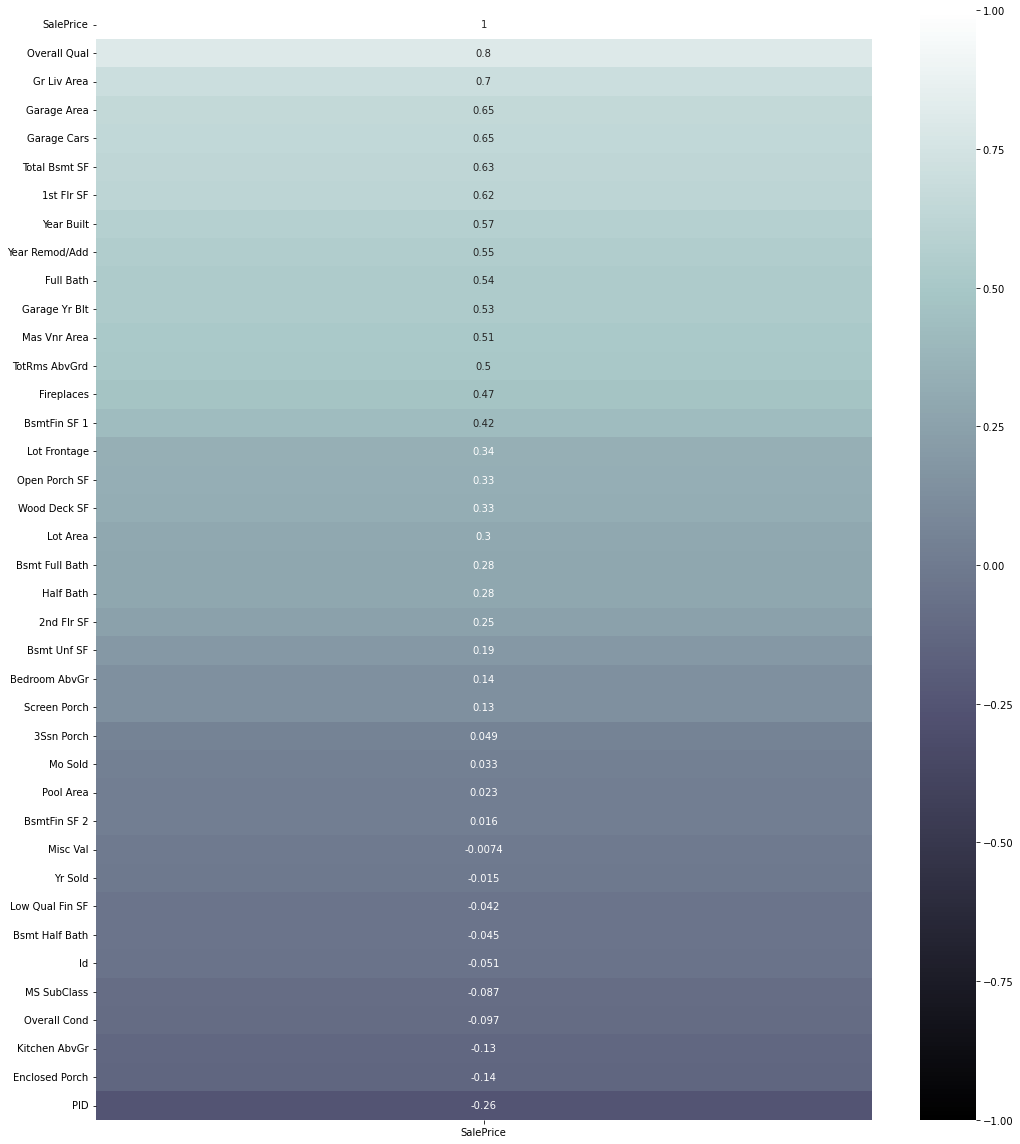

In [3]:
plt.figure(figsize = (15,16))
sns.heatmap(ahd.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), cmap='bone', vmax=1, vmin=-1, annot=True)
plt.tight_layout()
plt.savefig('Images/heatmap.png');

Created this heatmap to see what column datas had the highest correlation with sales price, which is the value we want our model to be able to predict.

### Functions to look at Columns

In [103]:
# if column is numerical
def numerical(column):
    a = ahd[column].mean()
    b = ahd[column].isnull().sum()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Relationship between ' + column + ' and Sale Price')
    fig.set_figheight(8)
    fig.set_figwidth(14)
    ax1.scatter(x=ahd[column], y=ahd['SalePrice'])
    ax2.hist(x=ahd[column])
    ax1.set(xlabel=column,ylabel="Sale Price")
    ax2.set(xlabel=column,ylabel="Number of Instances")
    print(column + ' Mean equals', a)
    print(column + ' Amount of nulls equals', b)

This will create a scatterplot and histogram for further examination of numerical data.

In [5]:
# if column is categorical
def categorical(column):
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x = column, y = "SalePrice", data = ahd);
    plt.ylabel("SalePrice")
    plt.xlabel("Categories")
    plt.show();

This will create a bar graph for further examination of categorical data

### First Model Creation

In [100]:
ahd1 = ahd[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Lot Area','Gr Liv Area','Garage Area','Pool Area','Overall Qual','Overall Cond','SalePrice']].dropna()


Chose these columns to look at first, because they had the highest correlation to Sale Price based on the heat map. I am also dropping rows where any column has an empty value.

Total Bsmt SF Mean equals 1057.9878048780488
Total Bsmt SF Amount of nulls equals 1
1st Flr SF Mean equals 1164.4880546075085
1st Flr SF Amount of nulls equals 0
2nd Flr SF Mean equals 329.32910775231596
2nd Flr SF Amount of nulls equals 0
Wood Deck SF Mean equals 93.83373963920039
Wood Deck SF Amount of nulls equals 0
Lot Area Mean equals 10065.20819112628
Lot Area Amount of nulls equals 0
Gr Liv Area Mean equals 1499.330082886397
Gr Liv Area Amount of nulls equals 0
Garage Area Mean equals 473.6717073170732
Garage Area Amount of nulls equals 1
Pool Area Mean equals 2.3978547050219405
Pool Area Amount of nulls equals 0
Overall Qual Mean equals 6.1121404193076545
Overall Qual Amount of nulls equals 0
Overall Cond Mean equals 5.562164797659678
Overall Cond Amount of nulls equals 0


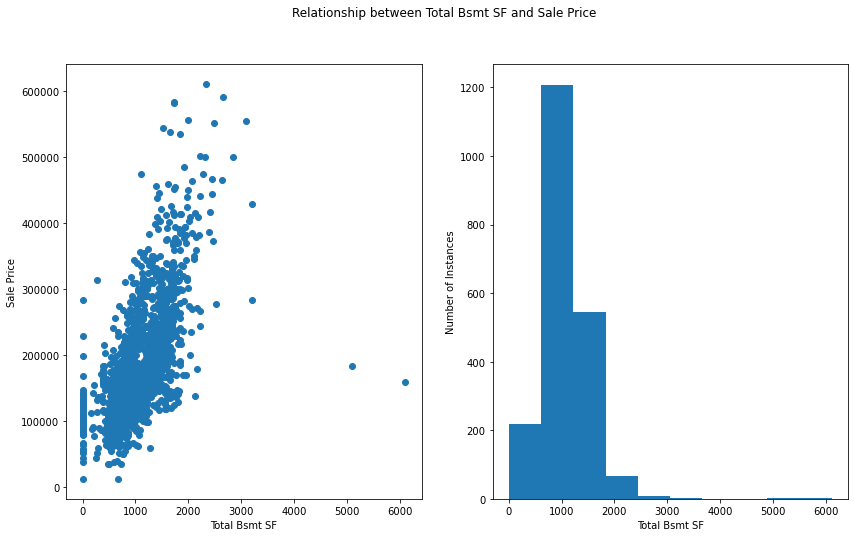

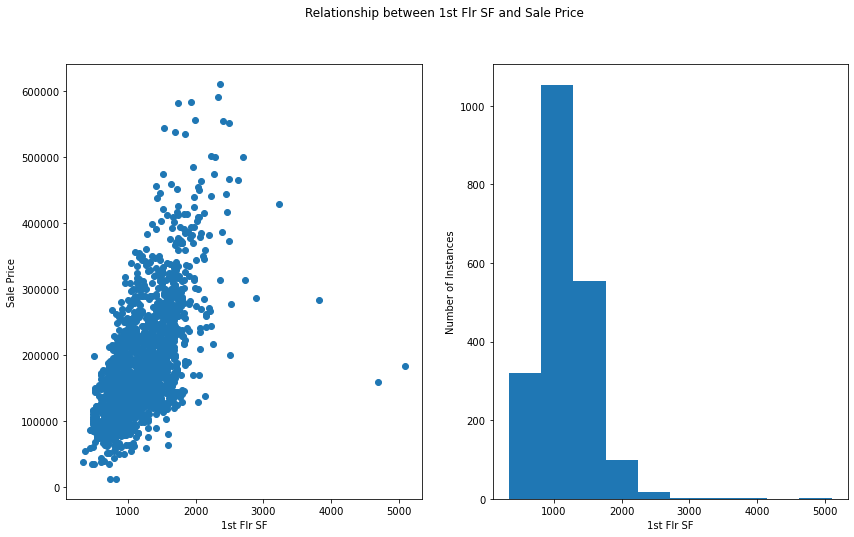

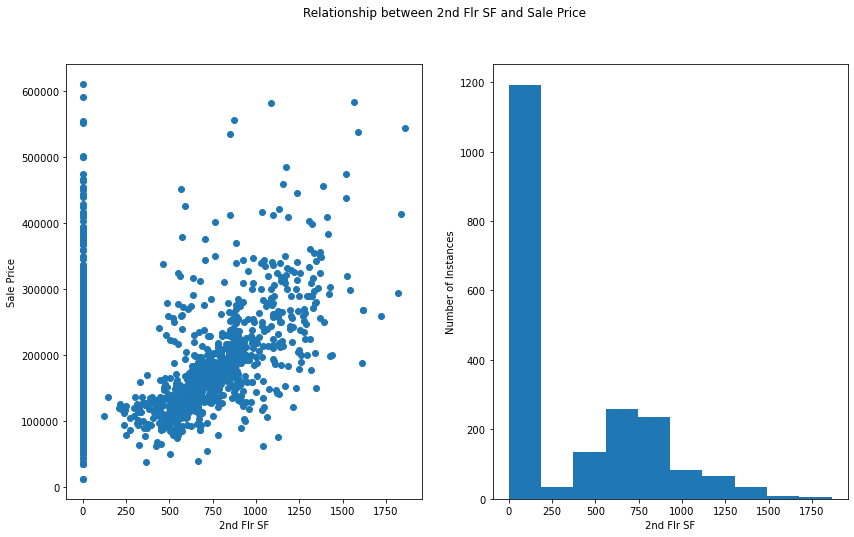

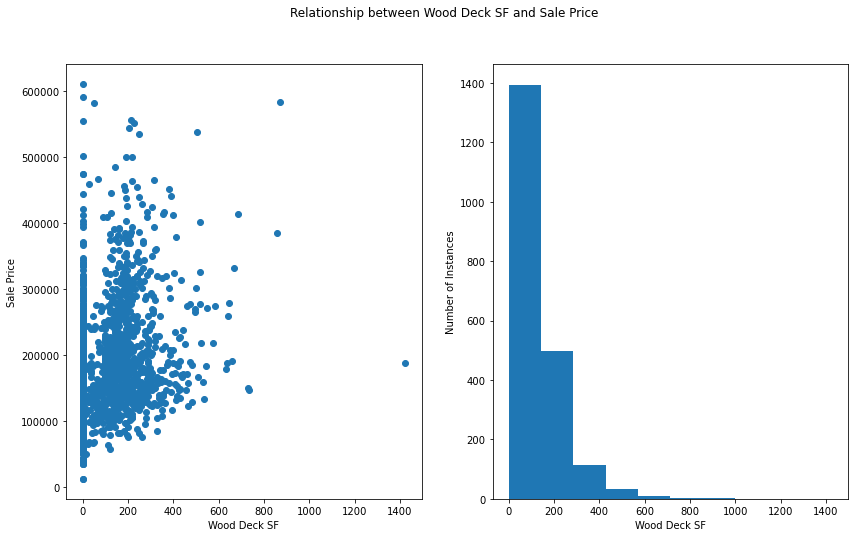

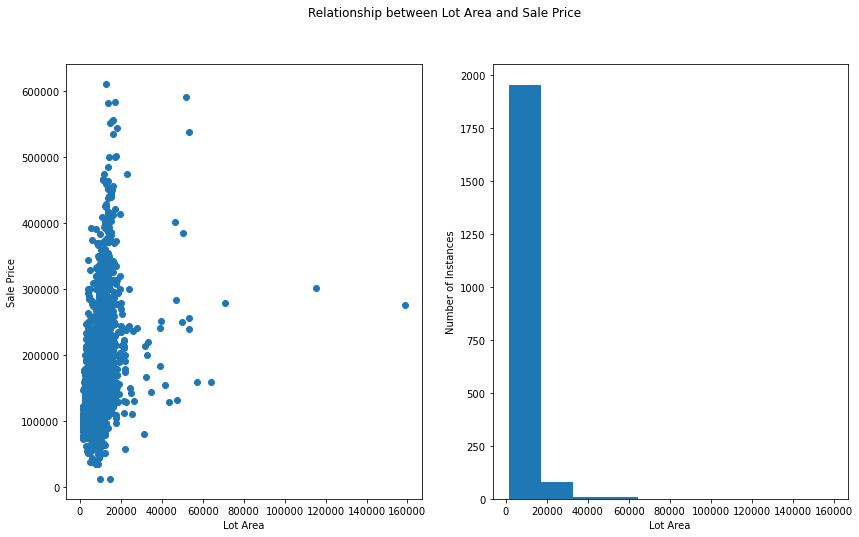

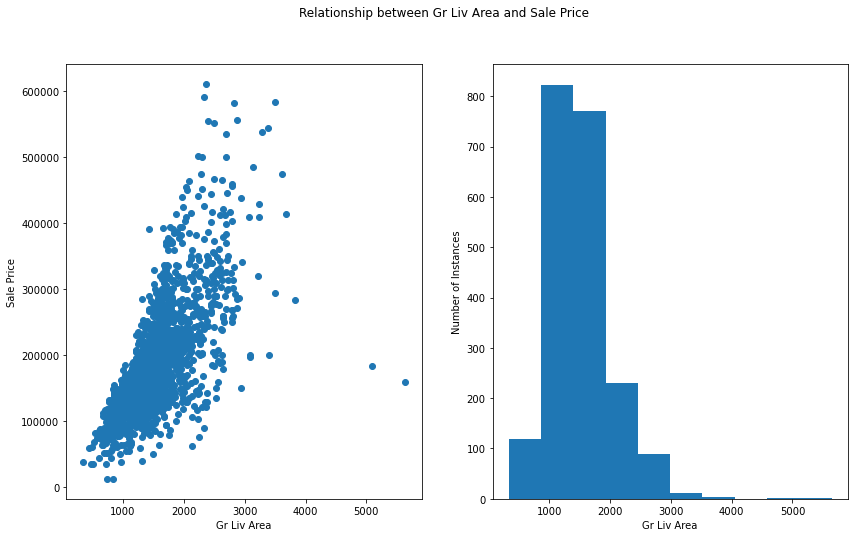

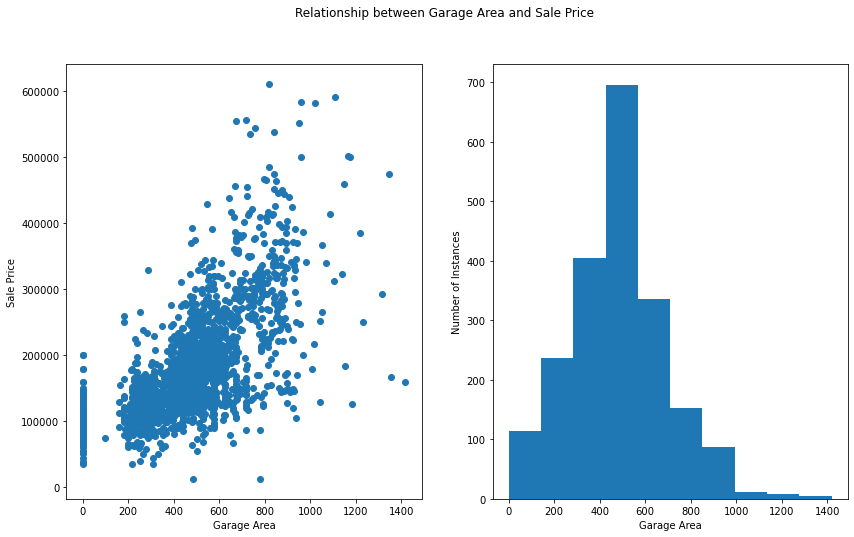

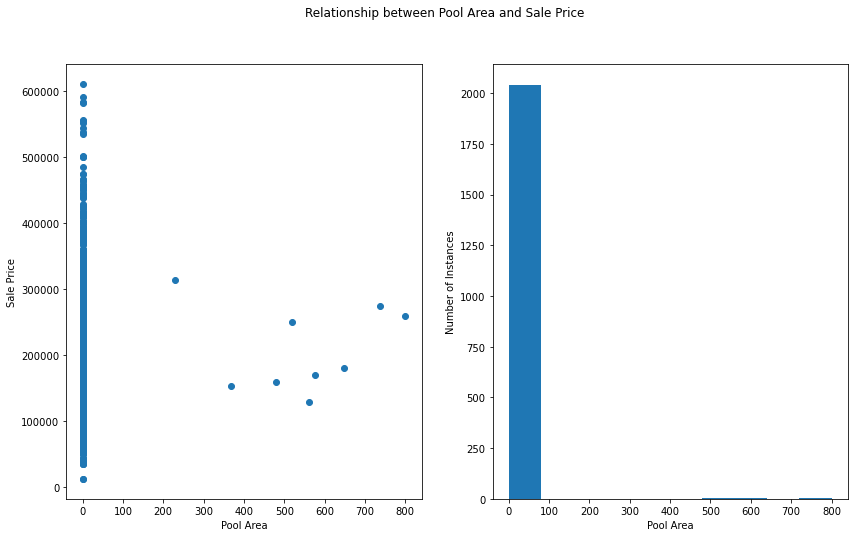

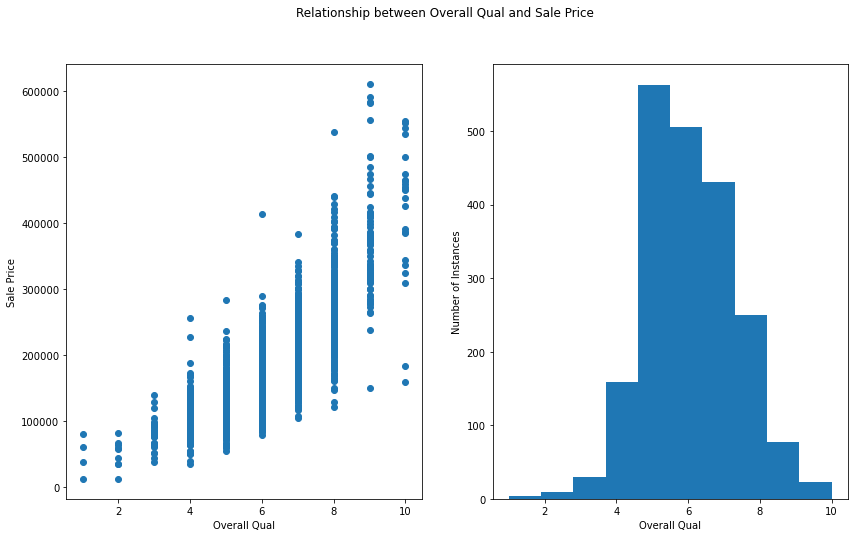

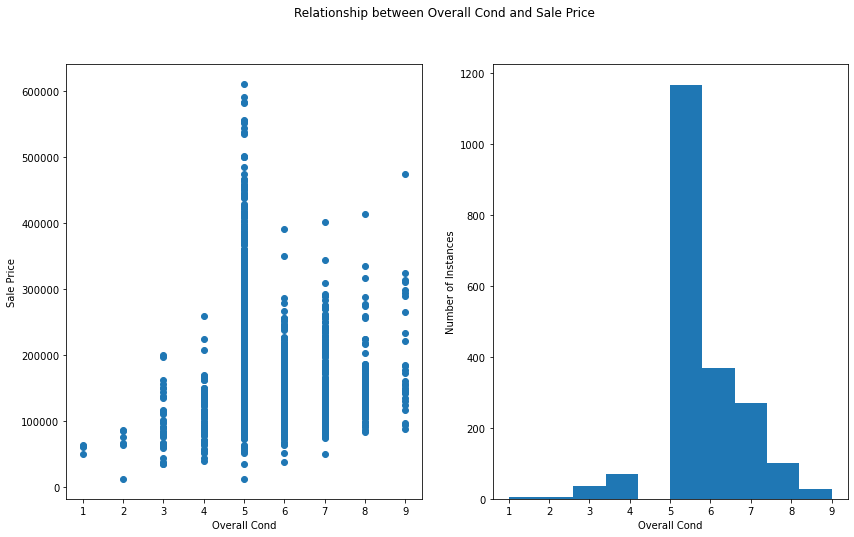

In [134]:
for i in ahd1.columns[:-1]:
    numerical(i)

Based on the scatter plots, most of the categories had a seemingly linear positive relationship with sale price, pool area had a scatterplot that was not linear, and showed that the majority of houses had no pool area. Lot area behaved the same way as pool area just a little less extreme. I will choose to leave pool area and Lot area out of the model. Most histograms did not have normal distribution.

In [221]:
X = ahd1[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Gr Liv Area','Garage Area','Overall Qual','Overall Cond']].dropna()
y = ahd1['SalePrice']


This will be the data used for the first model.

In [223]:
# for linear regression
def linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=420)
    lr=LinearRegression()
    lr.fit(X_train,y_train);
    a = cross_val_score(lr, X_train, y_train).mean()
    b = np.round(lr.coef_,4)
    preds = lr.predict(X_test)
    c = metrics.mean_squared_error(y_test,preds)
    d = metrics.r2_score(y_test,preds)
    e = lr.score(X_train,y_train)
    f = lr.score(X_test,y_test)
    print('training score equals', e)
    print(' ')
    print('testing score equals', f)
    print(' ')
    print('cross val score equals', a)
    print(" ")
    print('coefficients equals', b)
    print(" ")
    print('mean squared error equals', c)
    print(" ")
    print('r2 equals', d)
    
    

In [224]:
linear_regression(X,y)

training score equals 0.7961632513844381
 
testing score equals 0.7041863926452253
 
cross val score equals 0.7913024315150949
 
coefficients equals [ 3.1032500e+01  5.8670700e+01  4.9910800e+01  3.3100400e+01
 -2.4397000e+00  6.2169100e+01  2.3273172e+04  2.4716301e+03]
 
mean squared error equals 1752728147.1789906
 
r2 equals 0.7041863926452253


The negative coeficient is for Lot Area. Everytime Lot Area increases by 1 Sale Price will decrease by -2.  Right now based on the training and testing scores this model is overfit, the model is better handling the training data it was created with than other data. 

In [242]:
# for polynomial transformation
def polynomial(X,y):
    poly = PolynomialFeatures(include_bias = False)
    lr = LinearRegression()
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size = 0.8, random_state=420)
    lr.fit(X_train,y_train)
    preds = lr.predict(X_test)
    b = metrics.r2_score(y_test,preds)
    a = cross_val_score(lr, X_poly, y).mean()
    c = metrics.mean_squared_error(y_test,preds)
    d = lr.coef_
    e = lr.score(X_train,y_train)
    f = lr.score(X_test,y_test)
    print('training score equals', e)
    print(' ')
    print('testing score equals', f)
    print(' ')
    print('cross val score equals', a)
    print(' ')
    print('coefficients equals', d)
    print(' ')
    print('mean squared error equals', c)
    print(' ')
    print('r2 equals', b)
    print(' ')
    print(poly.get_feature_names())
    

In [243]:
polynomial(X,y)

training score equals 0.8712998933686591
 
testing score equals 0.7904900035539142
 
cross val score equals 0.8462487271980164
 
coefficients equals [-8.76869021e+00 -3.37883313e+01 -6.60067024e+01  8.01049472e+01
  5.99441905e+01 -4.12263211e+01 -1.38276839e+04  1.71115377e+04
  2.05696664e-02 -1.45585085e-01 -4.97186965e-02 -1.07971988e-02
  8.40557362e-02  2.62041064e-02  1.46016011e+01 -2.12815888e+00
 -5.68741440e-02 -2.43983968e-01  4.59173622e-02  1.07232647e-01
 -1.18273695e-01  4.45222059e+01  2.49066969e+00 -1.17756515e-01
  3.84368855e-02  1.96719026e-01 -8.52444055e-02  3.82776613e+01
 -9.97926347e-01 -1.45670586e-02 -1.52819164e-02  2.90464828e-02
 -1.61601652e+01  1.54101177e+00 -7.30877333e-02  1.13288053e-01
 -2.38275655e+01  3.06200761e+00 -4.32844359e-02  1.42576052e+01
  9.63899212e-01 -6.45423119e+02 -1.43591502e+03 -7.15357066e+02]
 
mean squared error equals 1241369763.7851331
 
r2 equals 0.7904900035539142
 
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2'

This model has done better than the basic linear regression model with a higher training, testing and cross val score. This model is also overfit. The coefficient for Total Basement SF * Overall condition shows that and increase of 1 will lead to a decrease of 2.12 for Sale Price. This model has a very hihg mean squared error value, which means that the distance between the estimated value and predicted value is large.

In [161]:
# for standard scaler
def standard_scaler(X,y):
    sc = StandardScaler()
    lr = LinearRegression()
    X_sc = sc.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, train_size = 0.8, random_state=420)
    lr.fit(X_train,y_train)
    preds = lr.predict(X_test)
    b = metrics.r2_score(y_test,preds)
    a = cross_val_score(lr, X_sc, y).mean()
    c = metrics.mean_squared_error(y_test,preds)
    d = lr.coef_
    e = lr.score(X_train,y_train)
    f = lr.score(X_test,y_test)
    print('training score equals', e)
    print(' ')
    print('testing score equals', f)
    print(' ')
    print('cross val score equals', a)
    print(' ')
    print('coefficients equals', d)
    print(' ')
    print('mean squared error equals', c)
    print(' ')
    print('r2 equals', b)

In [218]:
standard_scaler(X,y)

training score equals 0.7961632513844381
 
testing score equals 0.7041863926452255
 
cross val score equals 0.7774712611641851
 
coefficients equals [13945.68514204 23261.09565543 21238.7854423   4255.121282
 -1220.66373874 13421.82881553 33179.22781704  2729.34015431]
 
mean squared error equals 1752728147.178989
 
r2 equals 0.7041863926452255


This linear regression model that used standard scaler did better than the basic linear regression model, but worse than the linear regresion model that used polynomial features. This model was also underfit. One other thing is the the coefficient for Lot Area is also the one negative here. The coeffecient of Lot Area tells that for every increase of 1 unit for Lot Area, Sale Price will decrease by 1220.

In [244]:
def scaler_polynomial(X,y):
    sc=StandardScaler()
    lr=LinearRegression()
    poly = PolynomialFeatures(include_bias = False)
    X_new = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.8,random_state=420)
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
    lr.fit(Z_train,y_train)
    preds = lr.predict(Z_test)
    f = cross_val_score(lr, X_new, y).mean()
    b = metrics.r2_score(y_test,preds)
    c = metrics.mean_squared_error(y_test,preds)
    d = lr.coef_
    a = lr.score(Z_train,y_train)
    e = lr.score(Z_test,y_test)
    print('training score equals', a)
    print(' ')
    print('testing score equals', e)
    print(' ')
    print('cross val score equals', f)
    print('coefficients equals', d)
    print(' ')
    print('mean squared error equals', c)
    print(' ')
    print('r2 equals', b)
    
    
    

In [245]:
scaler_polynomial(X,y)

training score equals 0.9007093465794336
 
testing score equals 0.7685692995489037
 
cross val score equals 0.8462487271980164
coefficients equals [-1.44292251e+04 -5.62159586e+04 -7.95791405e+04  3.49857246e+04
  5.96295643e+04 -2.95547211e+04 -3.97056495e+04  1.45763560e+04
 -1.37030197e+04 -9.08280220e+04  5.48774319e+03  2.68815704e+04
  3.97147156e+04  5.31523726e+01  1.66479690e+05 -4.36396633e+04
  1.50700835e+03 -1.24644570e+05 -4.80247326e+04 -9.58047791e+04
 -3.68653196e+04 -2.54876605e+05  2.69819610e+05 -1.12984230e+05
 -1.56751770e+04  2.12484048e+05 -3.62153058e+04 -1.53367239e+05
  2.33607301e+05  1.87321554e+03  3.22532974e+04 -1.72898272e+04
 -1.09902217e+04 -1.11225012e+04  2.55233921e+04  9.18341453e+04
  3.62282837e+05 -2.74265198e+05 -5.61231030e+03  2.47588497e+04
  1.43917522e+04 -1.91791028e+04  4.68363265e+03 -2.75897544e+04]
 
mean squared error equals 1404832835.361924
 
r2 equals 0.7685692995489037


This is a linear regression that used polynomial features as well as scaled the data. This gave a very high training score, but low test score. Showing that the model is overfit. The coefficient 3.4985e+04 tells us that for every 1 unit increase in Wood Deck SF Sale Price will increase by 34985.7246. This model did worse than the models created before it, but I think it will do better after adding categorical variables to X. This model like the previous had very high mean squared error score.

In [262]:
def ridges(X,y):
    alphas = np.logspace(2, 7, 102)
    ridge_cv = RidgeCV(alphas = alphas, cv = 5)
    sc=StandardScaler()
    lr=LinearRegression()
    poly = PolynomialFeatures(include_bias = False)
    X_new = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.8,random_state=420)
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
    ridge_cv.fit(Z_train, y_train)
    preds = ridge_cv.predict(Z_test)
    b = metrics.r2_score(y_test,preds)
    c = metrics.mean_squared_error(y_test,preds)
    d = ridge_cv.coef_
    a = ridge_cv.score(Z_train,y_train)
    e = ridge_cv.score(Z_test,y_test)
    print('training score equals', a)
    print(' ')
    print('testing score equals', e)
    print(' ')
    print('coefficients equals', d)
    print(' ')
    print('mean squared error equals', c)
    print(' ')
    print('r2 equals', b)

In [263]:
ridges(X,y)

training score equals 0.7767932417293969
 
testing score equals 0.7765613344767597
 
coefficients equals [ 4.34964122e+03  3.87150359e+03  5.39055043e+00  1.47792933e+03
  3.08236265e+03  3.60143738e+03  6.98784164e+03 -1.74774770e+03
 -1.74346064e+03 -1.89687510e+03  4.27646840e+03 -1.58090993e+03
 -5.37249233e+02  2.61132248e+03  5.23124133e+03  3.86750113e+03
 -2.15620737e+03  2.77626231e+03 -1.80143146e+03 -1.18102280e+03
  1.96034162e+03  4.73081327e+03  3.44075544e+03  2.00097948e+03
  1.22330191e+03  2.43733104e+03  2.13576480e+03  1.82713330e+03
 -1.90684698e+02 -1.06969961e+03 -1.05627711e+03  5.84307376e+02
  1.91420572e+03  7.36512967e+02  2.33492903e+02  2.59131938e+03
  4.78698269e+03  2.46944718e+03  3.77727839e+03  6.06548359e+03
  2.65859252e+03  7.73954060e+03  4.24918991e+03 -2.10817014e+03]
 
mean squared error equals 1356319509.056783
 
r2 equals 0.7765613344767597


the training score and testing score of this model were very close showing that the the model fit well. The coefficient 1512 tells that for every one unit increase in Wood Deck SF, Sale Price will increase by 1512 units. The mean squared error for this model was also very high. 

In [266]:
def lassos(X,y):
    l_alphas = np.logspace(-3, 4, 102)
    lasso_cv = LassoCV(alphas = l_alphas)
    sc=StandardScaler()
    lr=LinearRegression()
    poly = PolynomialFeatures(include_bias = False)
    X_new = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.8,random_state=420)
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
    lasso_cv.fit(Z_train, y_train)
    preds = lasso_cv.predict(Z_test)
    b = metrics.r2_score(y_test,preds)
    c = metrics.mean_squared_error(y_test,preds)
    d = lasso_cv.coef_
    a = lasso_cv.score(Z_train,y_train)
    e = lasso_cv.score(Z_test,y_test)
    print('training score equals', a)
    print(' ')
    print('testing score equals', e)
    print(' ')
    print('coefficients equals', d)
    print(' ')
    print('mean squared error equals', c)
    print(' ')
    print('r2 equals', b)

In [267]:
lassos(X,y)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283653587.5253296, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304100118.78079224, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470465848.2385864, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate

training score equals 0.8640084902243534
 
testing score equals 0.8236894030151605
 
coefficients equals [     0.          12526.61001734     -0.            239.96909613
      0.              0.              0.             -0.
     -0.         -56417.33843039  18787.09461579     -0.
     -0.              0.          61567.72720697      0.
     -0.              0.             -0.             -0.
      0.              0.          14159.57821767      0.
     -0.              0.              0.              0.
      0.             -0.             -0.             -0.
      0.              0.             -0.              0.
   8099.92329239      0.              0.          23425.69095937
     -0.           2144.68368766     -0.             -0.        ]
 
mean squared error equals 1070242259.923957
 
r2 equals 0.8236894030151605


/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81026768729.02164, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83121959951.90207, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85207636993.08994, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_

This model had a very high training score and high testing score, training score was .04 higher than testing score showing that the model was a little over-fit. The coefficient 239.96909613 tells us for every 1 unit increase of Total Basement SF, Sale Price will increase by 239.96909613. The mean squared error was also very high for this model.

### Second Model Creation

Year Built Mean equals 1971.7089224768406
Year Built Amount of nulls equals 0


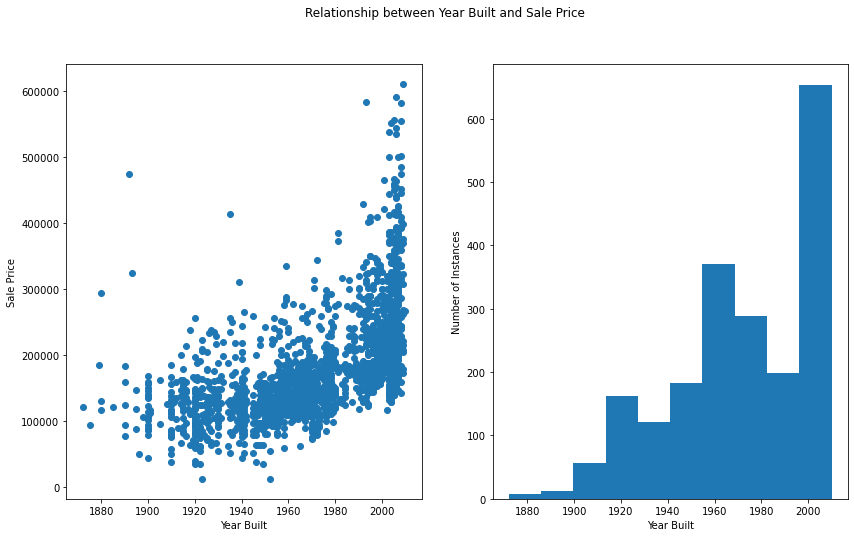

In [153]:
numerical('Year Built')

Year Remod/Add Mean equals 1984.1901511457825
Year Remod/Add Amount of nulls equals 0


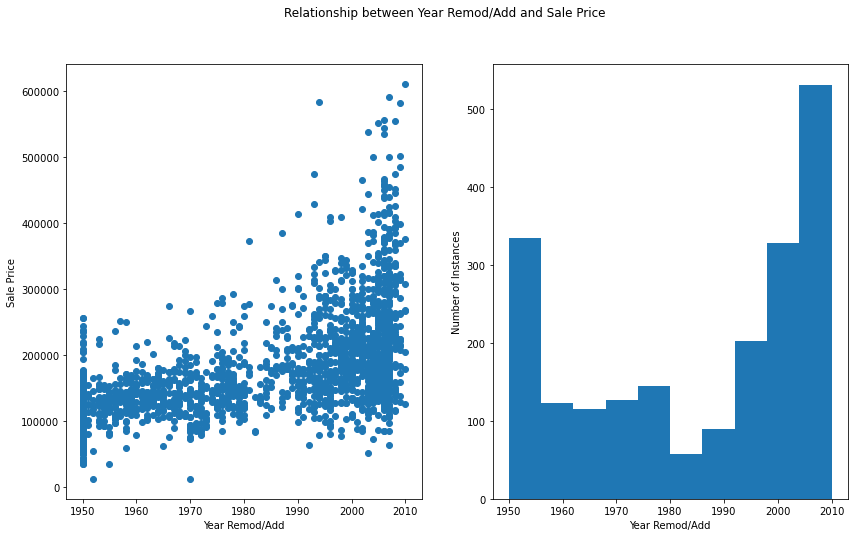

In [154]:
numerical('Year Remod/Add')

Garage Cars Mean equals 1.7765853658536586
Garage Cars Amount of nulls equals 1


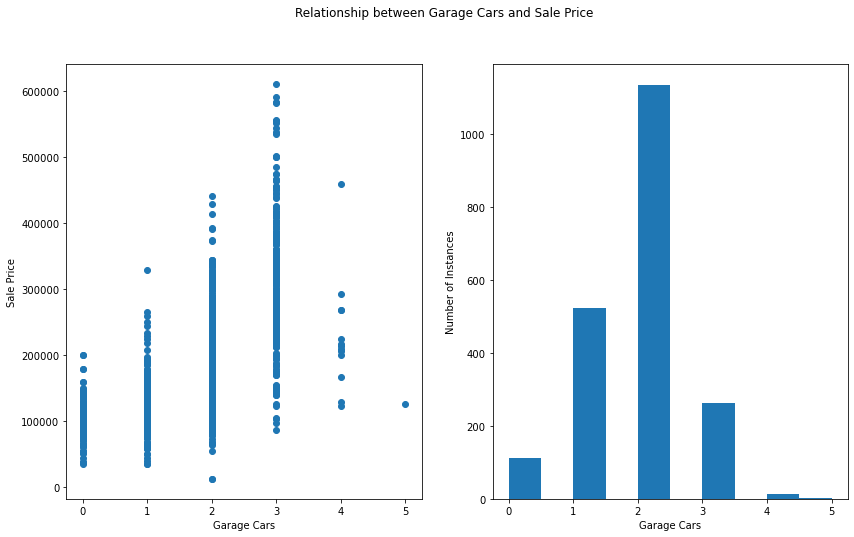

In [155]:
numerical('Garage Cars')

All three scatterplots showed somewhat of a linear positive relationship between the three variables and Sale Price. None of the three variables had normal distribution.

In [268]:
ahd2 = ahd[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Gr Liv Area','Garage Area','Overall Qual','Overall Cond','SalePrice','Garage Cars','Year Remod/Add','Year Built']].dropna()

In [269]:
X_1 = ahd2[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Gr Liv Area','Garage Area','Overall Qual','Overall Cond','Garage Cars','Year Remod/Add','Year Built']].dropna()
y = ahd1['SalePrice']

In [270]:
linear_regression(X_1,y)

training score equals 0.8081752375549087
 
testing score equals 0.723571359254259
 
cross val score equals 0.8038144549978636
 
coefficients equals [   28.8224    41.9814    30.9448    25.1531    20.1896    48.2866
 18294.3548  4731.8346   494.8567   199.4566   314.9485]
 
mean squared error equals 1637870088.7157447
 
r2 equals 0.723571359254259


The training score of the model is high, but the testing score is much lower showing that the model is overfit. the mean squared error is very high showing that the distance between the predicted value and actual value is high. Overall Quality had the highest coefficient telling us that it had the largest impact on Sale Price. For every one unit increase in Overall Quality, Sale Price will increaseby 18294.3548.

In [271]:
polynomial(X_1,y)

training score equals 0.8879857966398147
 
testing score equals 0.8754761497047854
 
cross val score equals 0.8584144735001139
 
coefficients equals [ 6.05030870e+02  4.16455744e+03  3.96895229e+03 -5.45102457e+01
 -5.25950566e+03 -1.21020960e+03 -2.02629261e+04  1.24667955e+05
  4.31094782e+05 -3.81999108e+04  9.72680691e+03  1.77699116e-02
  4.31643129e-02  1.17993335e-01  1.00260116e-02 -9.65683383e-02
 -8.69252384e-03  1.05041628e+01 -4.87790313e+00  1.24434677e+01
 -6.23647989e-02 -2.37251098e-01  1.69995652e-01  2.45463256e-01
  3.02184647e-01 -3.51940732e-01 -4.03200769e-01  6.14668995e+00
  1.56154504e+01  1.06457649e+02 -8.38126447e-01 -1.32437977e+00
  1.01962889e-01  3.14723035e-01 -2.63246439e-01 -3.55979969e-01
 -6.00887334e+00  1.57006487e+01  9.22166738e+01 -7.73370209e-01
 -1.29478381e+00  9.64796376e-03 -2.99881520e-01  6.48181563e-02
 -1.34105556e+01 -1.88885874e+00 -3.77682050e+00  2.08771906e-01
 -1.47739103e-01  1.59307544e-01  3.52912539e-01  1.34052879e+01
 -1.31

This model had a great training score and testing score. The testing score was only .01 less than the training score showing that the model was well fit. Garage cars had the highest coefficient meaning it had the biggest impact on Sale Price in this model. For every one unit increase in Garage Cars, Sale Price increased by 431094. This so far seems to be the best model created.

In [174]:
standard_scaler(X_1,y)

training score equals 0.8081752375549087
 
testing score equals 0.7235713592542596
 
cross val score equals 0.7897385570695776
 
coefficients equals [12952.49743097 16644.31845281 13168.10140065  3233.47433272
 10101.64344926 10424.70617518 26081.21337345  5225.20999164
   378.24114302  4193.63005147  9499.06559243]
 
mean squared error equals 1637870088.7157416
 
r2 equals 0.7235713592542596


This model did fairly well, but the testing score was much lower than the training score meaning the model was overfit. 1st Floor Square Footage had the highest coefficient meaning it had the biggest impact on Sale Price.

In [272]:
scaler_polynomial(X_1,y)

training score equals 0.9215209421910333
 
testing score equals 0.7954460572877449
 
cross val score equals 0.8584144735001139
coefficients equals [ 6.38611402e+05 -8.84547536e+04 -3.73698681e+05  6.39765870e+03
 -3.43237088e+05 -4.31726562e+05  2.64578927e+05 -1.62378241e+05
  2.06867943e+04 -2.29991728e+05 -7.10598815e+04 -1.86802704e+04
 -5.01953246e+04  4.28193725e+03  3.13988701e+04  6.38771245e+03
  2.90793428e+04  1.66299135e+05 -6.41287658e+04 -4.63110257e+03
  1.07750853e+05 -7.63914666e+05  5.71340353e+03 -9.01383686e+04
 -4.52628623e+04 -8.23473378e+04 -5.11736305e+04 -1.40266742e+05
  1.87376736e+05  1.34345246e+04  1.60390696e+03  3.15236121e+04
 -1.00610370e+05 -1.16960085e+04  1.85499696e+05 -1.41544191e+04
 -8.87388639e+04  1.59171010e+05 -2.15830987e+04  3.66226197e+05
 -5.82249422e+04  8.82638737e+03  9.34266290e+03 -2.36065360e+04
 -1.27011176e+04 -2.06357401e+04  1.78148663e+04  2.13853031e+05
 -1.80910180e+05  1.66251108e+04  2.72217317e+04  2.19070363e+05
 -1.9363

This model had a very high training score, but low testing score showing the model was overfit. The mean squared error was also very high for this model. Based on the coefficients Total Basement SF had the biggest impact on Sales Price for this model. 

In [273]:
ridges(X_1,y)

training score equals 0.7820144247726771
 
testing score equals 0.7967188343782268
 
coefficients equals [ 1974.93815095  1749.078196     373.11342254   508.41179703
  1720.15066114   971.53382597  3173.9722636   -103.98114357
   880.34393151  1914.90846802  2127.01044055  -994.67742289
 -1058.5393958   2639.73929047  -929.88356625  -210.29055197
   910.1071197   2415.12108214  2012.79657187  1804.51954434
  2013.78044487  2019.06342086 -1185.29110751  1949.35841431
 -1024.03810293  -499.63139766   557.92349558  2197.04960193
  1863.00437854  1429.40251688  1793.57515552  1800.90378588
  1365.07421785   727.66049371  1692.91321012  1271.06492684
  1300.57881517   444.01628584  1213.4464008    406.63833223
   424.5256714   -484.52167645  -589.0984889    144.59202529
   799.24604359   259.19009804   852.17886842   516.45031959
   542.5435842    425.92266336  1054.08157473  2500.99429845
  1791.17490606  1738.95321762  1776.994122    1802.28846006
  1463.71061016  2469.92922867   780.9004

This model had lower training and testing scores than some of the previous models. Both training and testing score were close to each other with testing score being higher than training score by 0.14. Making this model pretty well fit to the data if only a little underfit. Based on the coefficients Overal Condition had the largest impact on Sale Price for this model.

In [274]:
lassos(X_1,y)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446722920.4064636, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580220325.6920471, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363592046.36169434, tolerance: 235028218.43456393
  model = cd_fast.enet_coordinate

training score equals 0.8323971524050118
 
testing score equals 0.810735403057036
 
coefficients equals [     0.              0.             -0.              0.
      0.              0.              0.             -0.
      0.              0.              0.             -0.
     -0.          20847.58241555     -0.             -0.
      0.              0.              0.              0.
      0.           7449.77774383 -10428.98576394      0.
     -0.             -0.              0.              0.
  14658.35200348      0.              0.           9095.82501403
      0.              0.              0.              0.
      0.             -0.              0.             -0.
     -0.             -0.             -0.              0.
      0.              0.              0.              0.
      0.             -0.              0.              0.
      0.              0.              0.              0.
      0.          10062.14457453      0.              0.
      0.              0.         

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92311968327.9181, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92337923719.87094, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_descent_gram(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92357638893.23087, tolerance: 240804079.33044758
  model = cd_fast.enet_coordinate_d

This lasso model did very well. It had good training scores and testign scores. The difference between them being .02 with training score being a little higher. The mean squared error for this model was very high showing that there is a big difference between predicted value and actual value.

### Third Model Creation

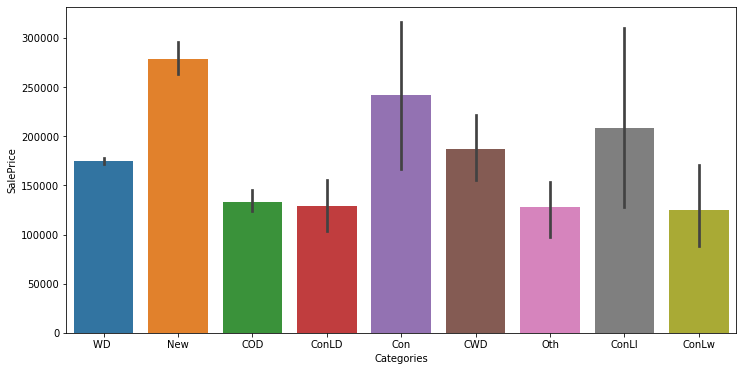

In [179]:
categorical('Sale Type')

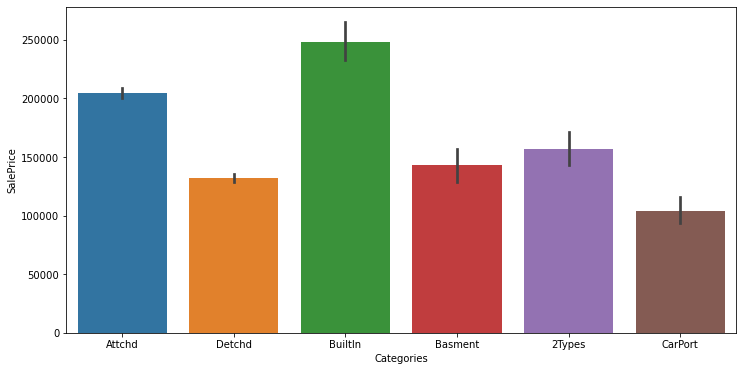

In [180]:
categorical('Garage Type')

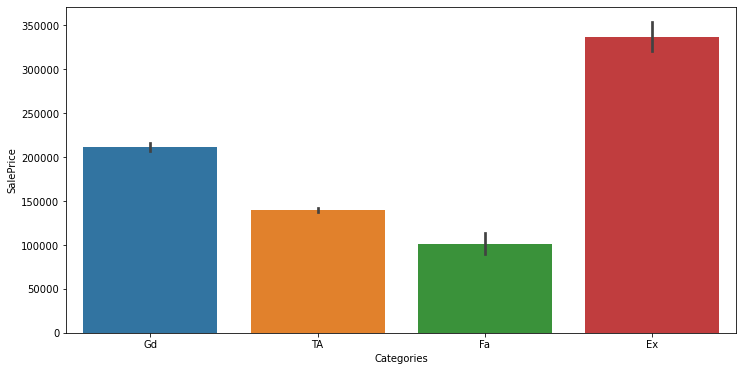

In [189]:
categorical('Kitchen Qual')

We have now added categorical variables to our models. Lookign at the three bar graphs it is shown there is enough difference between the categories of each variable that these three variables could work in helping increase how well the models created work.

In [275]:
ahd4 = ahd[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Gr Liv Area','Garage Area','Overall Qual','Overall Cond','SalePrice','Garage Cars','Year Remod/Add','Year Built','Sale Type', 'Garage Type','Kitchen Qual']].dropna()

In [282]:
X_3 = ahd4[['Total Bsmt SF', '1st Flr SF','2nd Flr SF', 'Wood Deck SF','Gr Liv Area','Garage Area','Overall Qual','Overall Cond','Garage Cars','Year Remod/Add','Year Built','Sale Type', 'Garage Type','Kitchen Qual']].dropna()
X_3 = pd.get_dummies(columns = ['Sale Type'], drop_first = True, data = X_3)
X_3 = pd.get_dummies(columns = ['Garage Type'], drop_first = True, data = X_3)
X_3 = pd.get_dummies(columns = ['Kitchen Qual'], drop_first = True, data = X_3)
y = ahd4['SalePrice']


In [277]:
linear_regression(X_3,y)

training score equals 0.818046755713561
 
testing score equals 0.8376522882284939
 
cross val score equals 0.797853050998509
 
coefficients equals [ 1.50672000e+01  3.95117000e+01  2.94072000e+01  2.49494000e+01
  1.05778000e+01  3.37759000e+01  1.42894557e+04  4.90665700e+03
  1.17007242e+04  6.39666000e+01  2.50075700e+02  1.58962522e+04
  4.91127785e+04  2.31421939e+04  3.41168400e+03  1.68608189e+04
  2.24297948e+04  3.03942922e+04  1.15510985e+04  3.92190195e+04
  3.73517405e+04  4.50709647e+04  2.18457356e+04  3.14418031e+04
 -5.76418818e+04 -5.52273722e+04 -6.24505378e+04]
 
mean squared error equals 1034862626.1729327
 
r2 equals 0.8376522882284939


This model had high training and testing scores, with both scores being close with a difference of only .019. Meaning that the model is pretty well fit. The cross val score was low with this model at only 0.798. and the mean squared error was large showing a big difference between predicted value and actual value.

In [283]:
polynomial(X_3,y)

training score equals 0.9197736772676569
 
testing score equals -261003766.82732242
 
cross val score equals -124168580.94412327
 
coefficients equals [-2.90484347e+05  8.43209736e+05  9.81022018e+04 -1.30206197e+06
  9.62405816e+05  3.31686913e+06  1.15909241e+08 -1.77953357e+08
 -9.42037783e+08 -1.38107348e+07  1.86599693e+06  4.97166110e+02
 -4.97995529e+03 -4.84984883e+07 -2.56697959e+03 -1.30984294e+03
 -2.14667080e+08 -1.57913651e+03  2.29099462e+09 -8.64245786e+09
 -7.18968357e+09 -8.41072107e+09  7.70444334e+07 -8.64233723e+09
 -3.51262904e+08  1.58197657e+08 -7.61873729e+08 -9.60481167e-03
  8.15767363e-01  8.77694011e-01  7.99323916e-02 -8.54706362e-01
 -5.37149608e-04  7.72408320e+00 -1.72225292e+00  3.56025157e+01
 -2.25818150e-01 -4.21705060e-01  4.60038315e+01 -6.35283224e+01
 -2.33301852e+06  2.49631432e+05  8.86449239e+01  1.51281992e+01
 -1.22866536e+02 -8.54193495e+00  2.91805308e+05  2.91815809e+05
  2.91715950e+05 -1.21323693e+07  2.91780295e+05 -3.23310359e+01
 -2.

The model had a very high training score, but a negative testing and cross val score. This most likely is because of the high number of columns created when using this model. Using get_dummies on three columns already creates many columns, using polynomial features will increase it by much more leading to a model that has a negative testing and cross val score.

In [278]:
standard_scaler(X_3,y)

training score equals 0.8180467557135611
 
testing score equals 0.8376522882284939
 
cross val score equals -0.7810716135476043
 
coefficients equals [  6750.17738326  15714.9509474   12594.05810952   3245.03602387
   5248.71158822   6360.67345058  19920.38173164   5207.21754938
   7612.33661946   1328.1027629    7307.14921585   1139.50840808
   2230.09163133   1960.82973789    189.63466472    855.75501068
   6140.65034661   1195.537591     3951.35732325  18971.03073857
   4380.16364761  11360.48134565   1641.9995366   14052.27777592
  -7119.58817601 -27148.13569749 -31225.1189289 ]
 
mean squared error equals 1034862626.1729327
 
r2 equals 0.8376522882284939


This model had a good training and testing score, with not much difference between them. The model is pretty well fit with testing score being .019 larger than training score. The model has a cross val score equal to -0.781, which is the first negative cross val score had by any model in this project.

In [279]:
ridges(X_3,y)

training score equals 0.907495640958959
 
testing score equals 0.6391218897566096
 
coefficients equals [ 1.05127236e+03  8.41965230e+02  8.98862545e+02  2.15053825e+02
  1.41758487e+03 -1.46909206e+02  1.60005373e+03  6.39053326e+02
 -1.33399017e+02  1.17908350e+03  2.55484967e+03  7.91915275e+01
  1.13155111e+02  2.30576343e+02  2.63468625e+01  6.20038057e+00
  2.85485057e+01  0.00000000e+00  7.41187823e+02 -8.11491809e+01
  1.15037810e+02  3.58872825e+02 -1.30240419e+02  5.16588421e+02
  7.81443630e+01 -1.67608861e+03 -1.75657545e+02  3.91561894e+03
  2.83074221e+03  1.81653793e+03  4.15352811e+02  3.42595134e+03
  3.20995107e+03  3.70679307e+03  6.73051152e+02  2.03936399e+03
  1.13825997e+03  1.18778520e+03  7.91915275e+01  4.60870614e+02
  2.93930368e+02  2.63468625e+01  6.20038057e+00  2.92410005e+03
  0.00000000e+00 -9.32205965e+02  1.72624192e+03 -1.76412762e+02
 -1.61090318e+01 -2.44388862e+01 -3.74965547e+02 -1.02859326e+03
 -1.09319142e+02 -3.36958808e+03  2.45368754e+03  4

Ridges had a very high training score but very low testing score meaning that the model was overfit. The mean squared error ws also very high leadign to the thought that the predicted value and actual value are very far apart. 

In [280]:
lassos(X_3,y)

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233181350.64666748, tolerance: 203531285.80393204
  model = cd_fast.enet_coordinate_descent(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417932565.13723755, tolerance: 203531285.80393204
  model = cd_fast.enet_coordinate_descent(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511345546.2606354, tolerance: 203531285.80393204
  model = cd_fast.enet_coordinate_descent(

training score equals 0.9087991141100809
 
testing score equals 0.5688770302904989
 
coefficients equals [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.22349840e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  8.41986315e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.88340050e+03
  1.40706060e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.05991011e+03  0.00000000e+00 -0.00000000e+00  8.59738382e+03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.46813391e+02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.24117586e+03  0.00000000e+00  

/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52568396928.265205, tolerance: 214617182.00083098
  model = cd_fast.enet_coordinate_descent(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52555477904.06386, tolerance: 214617182.00083098
  model = cd_fast.enet_coordinate_descent(
/Users/prathikchukkapalli/opt/miniconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52542181656.36535, tolerance: 214617182.00083098
  model = cd_fast.enet_coordinate_descent(


This model had a high training score, but very low testing score meaning that the model is overfit. The mean squared error is also very high leading to the thought that the actual value and predicted value are far apart. Looking at the coefficients many of the X categories did not have any impact on Sale Price.

In [284]:
ridge_1(X_3,y)

training score equals 0.8659149601321855
 
testing score equals 0.7835283350715981
 
coefficients equals [ 15768.49826403  12212.10883733   8907.24813049   2919.4868804
  16523.89833677   9124.36190259  18479.02308649   5438.41724167
   -415.74837871   3451.99891607   8345.75572803    966.30733055
   3580.34162358   3165.21813571    261.72067059    542.80186629
   8945.7822223       0.           3867.69941215   3922.14213661
    366.21414136   3481.23899969  -3291.23549296   5757.69521545
  -6919.41522684 -22078.37180168 -23002.30188506]
 
mean squared error equals 1334757018.3013172
 
r2 equals 0.7835283350715981


This model had a high training score, but low testing score meaning the model is overfit. The mean squared error is also very high. I created this ridge model after seeing the affect adding categorial categories and using get_dummies did to my linear regression model that used polynomial features. It was becayse of that, that I created another ridge model that only used standard scaler, but no polynomial feature.

### Thoughts ###

The best model with the highest training, test, and cross val score was the linear regression model with polynomial features that was created before adding any categorical variables. It had a training score of 0.8879857966398147, testing score of 0.8754761497047854 and cross val score of 0.8584144735001139. The best model after using categorical variables was a simple linear regression model with training score of 0.818046755713561, testing score of 0.8376522882284939 and cross val score of 0.797853050998509. It seems that adding the categorical values did help the models perform well.